In [2]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.19.0%2Bcu118-cp312-cp312-win_amd64.whl (5.0 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.4.0%2Bcu118-cp312-cp312-win_amd64.whl (4.0 MB)
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 2.6 MB/s eta 0:16:59
     ---------------------------------------- 0.0/2.7 GB 2.5 MB/s eta 0:18:00
     ---------------------------------------- 0.0/2.7 GB 2.5 MB/s eta 0:17:41
     ---------------------------------------- 0.0/2.7 GB 2.5 MB/s eta 0:17:57
     ---------------------------------------- 0.0/2.7 GB 2.4 MB/s eta 0:18:28
     ---------------------------------------- 0.0/2.7 GB 2.5 MB/s eta 0:18:13
     ---------------------------------------- 0.0/2.7 GB 2.5 MB/s eta 0:18:14
     ---------------------------------------- 0.0/2.7 GB 2.4 MB/s eta 0:18:31
     -----------

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    torch from https://download.pytorch.org/whl/cu118/torch-2.4.0%2Bcu118-cp312-cp312-win_amd64.whl#sha256=bd16a12a003fe58276d7b7394a3760d576eb8dbfb4bacea025eb52a1eaf5172b:
        Expected sha256 bd16a12a003fe58276d7b7394a3760d576eb8dbfb4bacea025eb52a1eaf5172b
             Got        19407f42b8bbdc63049fabf170290bf40924f184023a9e3fdb680534a78352b6



In [25]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [6]:
!cd yolov5 & pip install -r requirements.txt

     ---------------------------------------- 0.0/41.3 kB ? eta -:--:--
     ---------------------------------------  41.0/41.3 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 41.3/41.3 kB 2.1 MB/s eta 0:00:00
  Using cached setuptools-71.1.0-py3-none-any.whl.metadata (6.6 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 2.6 MB/s eta 0:00:16
   ---------------------------------------- 0.2/38.8 MB 3.0 MB/s eta 0:00:13
    --------------------------------------- 0.5/38.8 MB 3.9 MB/s eta 0:00:10
    --------------------------------------- 0.7/38.8 MB 4.1 MB/s eta 0:00:10
    --------------------------------------- 0.9/38.8 MB 4.2 MB/s eta 0:00:10
    --------------------------------------- 1.0/38.8 MB 4.0 MB/s eta 0:00:10
   - -------------------------------------- 1.2/38.8 MB 3.7 MB/s eta 0:00:11
   - -------------------------------------- 1.5/38.8 MB 4.1 MB/s eta 0:00:10
   - ---------

In [26]:
import torch
print(torch.__version__)

2.4.0


In [27]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [28]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-29 Python-3.12.4 torch-2.4.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [29]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [30]:
img='https://media.wired.com/photos/593256b42a990b06268a9e21/master/pass/traffic-jam-getty.jpg'

In [31]:
results = model(img)
results.print()

C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 684x1025 61 cars
Speed: 354.2ms pre-process, 149.0ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


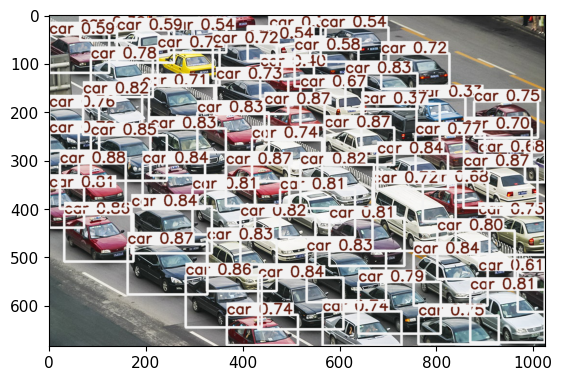

In [32]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

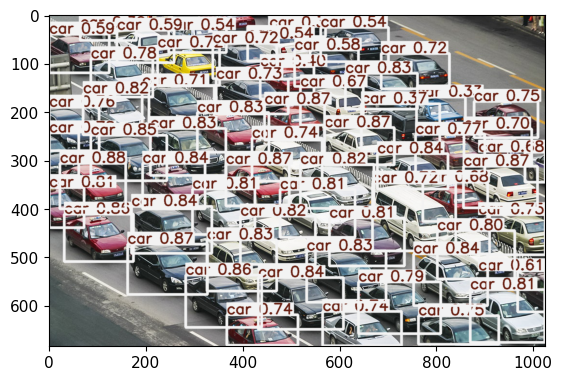

In [33]:
plt.imshow(np.squeeze(results.render()))

In [34]:
import cv2
import numpy as np


cap = cv2.VideoCapture(0)


if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

try:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            print("Error: Failed to capture frame.")
            break
        
       
       
        results = model(frame)
        
        
        cv2.imshow('YOLO', np.squeeze(results.render()))
        
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
finally:
    
    cap.release()
    cv2.destroyAllWindows()


C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master\models

In [10]:
import uuid   
import os
import time

In [11]:
IMAGES_PATH = os.path.join('data', 'images') 
labels = ['VTS Id Card', 'VTS Access Card']
number_imgs = 20

In [22]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg') 
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [12]:
print(os.path.join(IMAGES_PATH,labels[0]+'.'+str(uuid.uuid1())+'jpg'))

data\images\VTS Id Card.72d2b9f8-4d93-11ef-90fd-b48c9d66d1edjpg


In [13]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

data\images\VTS Id Card.758f7f2f-4d93-11ef-84f9-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f30-4d93-11ef-9487-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f31-4d93-11ef-9feb-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f32-4d93-11ef-921f-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f33-4d93-11ef-8de4-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f34-4d93-11ef-85fd-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f35-4d93-11ef-a89d-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f36-4d93-11ef-b634-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f37-4d93-11ef-b785-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f38-4d93-11ef-9234-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f39-4d93-11ef-8eca-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f3a-4d93-11ef-af89-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f3b-4d93-11ef-8d77-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f3c-4d93-11ef-9fad-b48c9d66d1ed.jpg
data\images\VTS Id Card.758f7f3d-4d93-11ef-8b07-b48c9d66d1ed.jpg
data\images\VTS Id Card.7

In [14]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [15]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 1000 --data dataset.yml --weights yolov5s.pt --workers 2

In [36]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp8/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\suhai/.cache\torch\hub\master.zip
YOLOv5  2024-7-29 Python-3.12.4 torch-2.4.0 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [37]:
img = os.path.join('data', 'images', 'VTS Id Card.5c96b383-4b1d-11ef-8ccb-b48c9d66d1ed.jpg')

In [38]:
results = model(img)

C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [39]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 9.0ms pre-process, 200.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


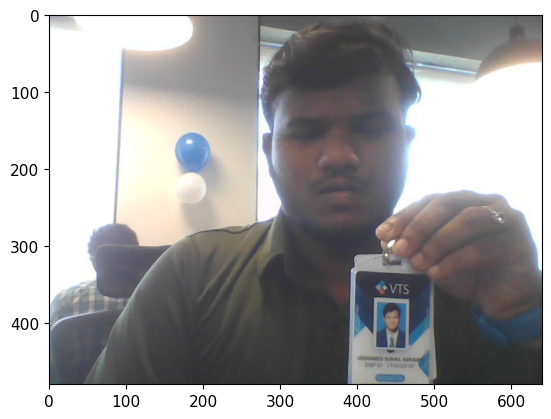

In [20]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [42]:
import cv2
import numpy as np


cap = cv2.VideoCapture(0)


if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

try:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            print("Error: Failed to capture frame.")
            break
        
        
        
        results = model(frame)
        
        
        cv2.imshow('YOLO', np.squeeze(results.render()))
        

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
finally:
    
    cap.release()
    cv2.destroyAllWindows()


C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\suhai/.cache\torch\hub\ultralytics_yolov5_master\models